# Визуализация и анализ данных

In [91]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_figsize = 'svg'

In [92]:
matplotlib.rcParams.update({'font.size': 14}) # размер шрифта на графиках

**Пути к директориям и файлам**

In [93]:
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

#### **Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

longitude - долгота

latitude - широта

housing_median_age - средний возраст дома

total_rooms - общее количество комнат

total_bedrooms - общее количество спален

population - количество проживающих

households - домохозяйства (семья)

ocean_proximity - близость океана

median_income - средний доход

median_house_value - средняя стоимость дома

In [94]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,False,False,False,True,False,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,False,False,False,True,False,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,False,False,False,True,False,2083.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445840,0.437991,False,False,False,True,False,2083.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209588,0.347265,False,False,False,True,False,2083.0


In [95]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
bedroom_share          float64
population_per_room    float64
<1H OCEAN                 bool
INLAND                    bool
ISLAND                    bool
NEAR BAY                  bool
NEAR OCEAN                bool
median_rooms           float64
dtype: object

## **Уменьшение объема памяти, который занимает датасет** **

In [96]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [97]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.15 MB
Memory usage after optimization is: 1.36 MB
Decreased by 36.7%


In [98]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
bedroom_share           float32
population_per_room     float32
<1H OCEAN               float32
INLAND                  float32
ISLAND                  float32
NEAR BAY                float32
NEAR OCEAN              float32
median_rooms            float32
dtype: object

In [99]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0.0,0.0,0.0,1.0,0.0,2083.0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0.0,0.0,0.0,1.0,0.0,2083.0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0.0,0.0,0.0,1.0,0.0,2083.0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445839,0.437991,0.0,0.0,0.0,1.0,0.0,2083.0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209589,0.347265,0.0,0.0,0.0,1.0,0.0,2083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.089996,39.480000,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,22.462463,0.507508,0.0,1.0,0.0,0.0,0.0,2130.0
20636,-121.209999,39.490002,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,21.520803,0.510760,0.0,1.0,0.0,0.0,0.0,2130.0
20637,-121.220001,39.430000,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,21.517303,0.516859,0.0,1.0,0.0,0.0,0.0,2130.0
20638,-121.320000,39.430000,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,21.989246,0.398387,0.0,1.0,0.0,0.0,0.0,2130.0


## 1. Распределение целевой переменной

* Помните про различие среднего  

* Среднее арифмитическое (мат ожидание) подходят для нормальных распределений = SUM / N

* Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда

* Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке


In [100]:
x = np.array([0, 0, 0, 0, 0, 0, 1])
np.quantile(x, q=0.5)

np.float64(0.0)

Пока не рассматриваем зависимость целевой переменной от фичей

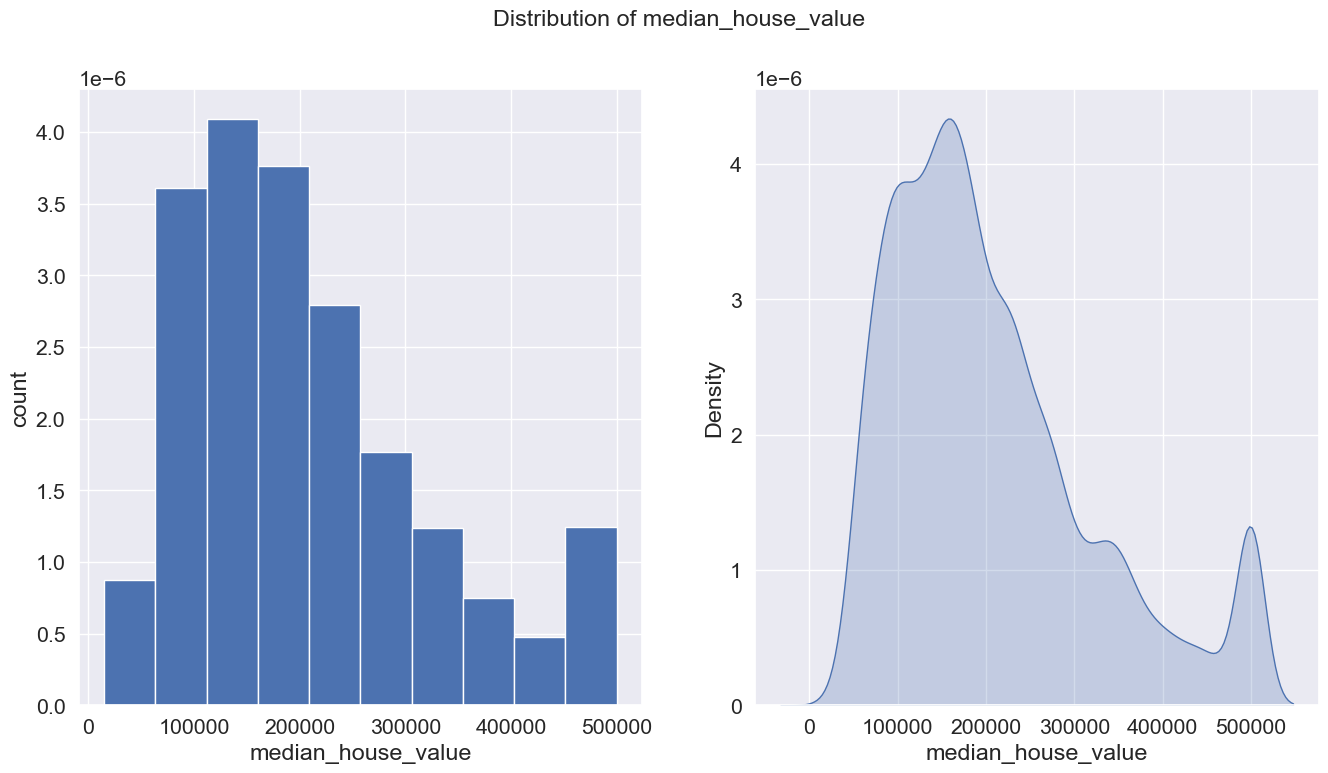

In [101]:
plt.figure(figsize= (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=True, edgecolor='white')
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], fill=True)
plt.xlabel('median_house_value')

plt.grid(visible=0.3)
plt.suptitle('Distribution of median_house_value')
plt.show()

In [102]:
target_mean = round(df['median_house_value'].mean(), 2) 
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

(np.float32(206855.81), np.float32(179700.0), np.float32(500001.0))

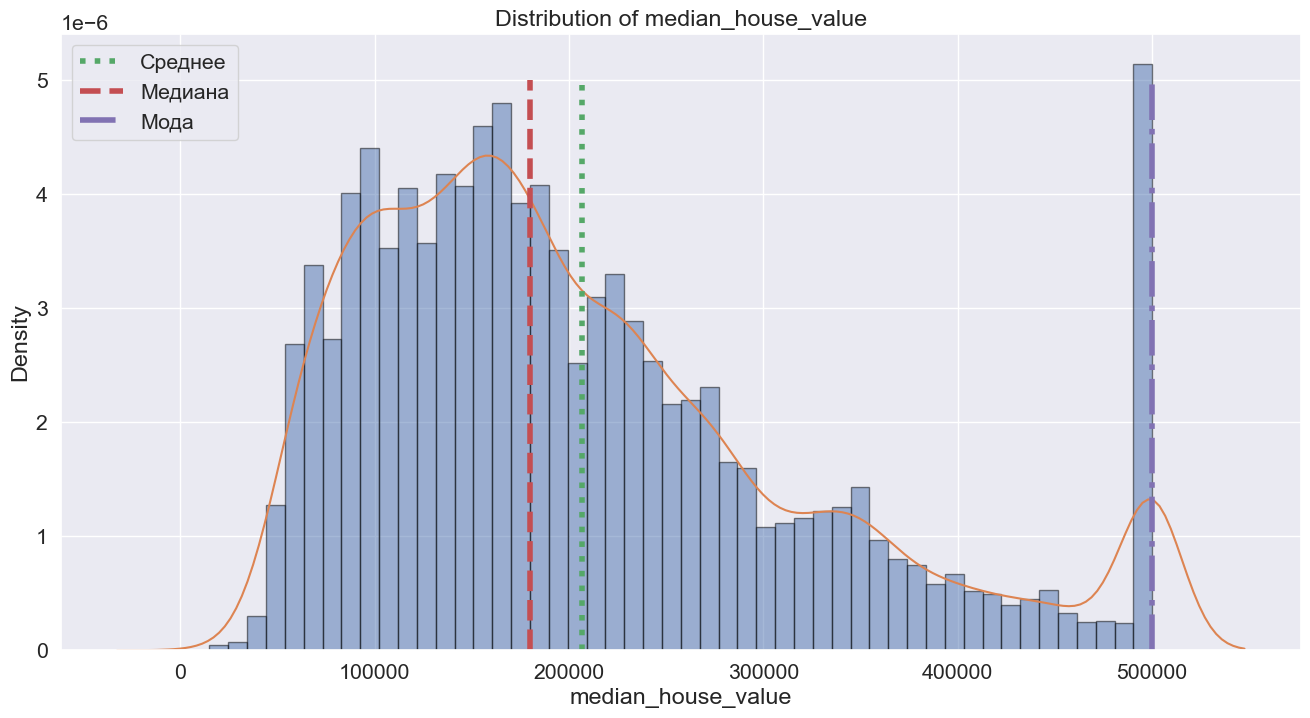

In [103]:
plt.figure(figsize=(16, 8))

plt.hist(df['median_house_value'], bins=50, density=True, alpha=0.5, edgecolor='black')
sns.kdeplot(df['median_house_value'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='Среднее', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='Медиана', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='Мода', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')

plt.legend()
plt.show()

(!) **Визуально** мода будет отличаться при разном количестве bins

Мода - мера "среднего" для категориальных признаков

In [104]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

np.float32(160000.0)

In [105]:
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635     70000.0
20636     70000.0
20637     90000.0
20638     80000.0
20639     80000.0
Name: median_house_value, Length: 20640, dtype: float32

In [106]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

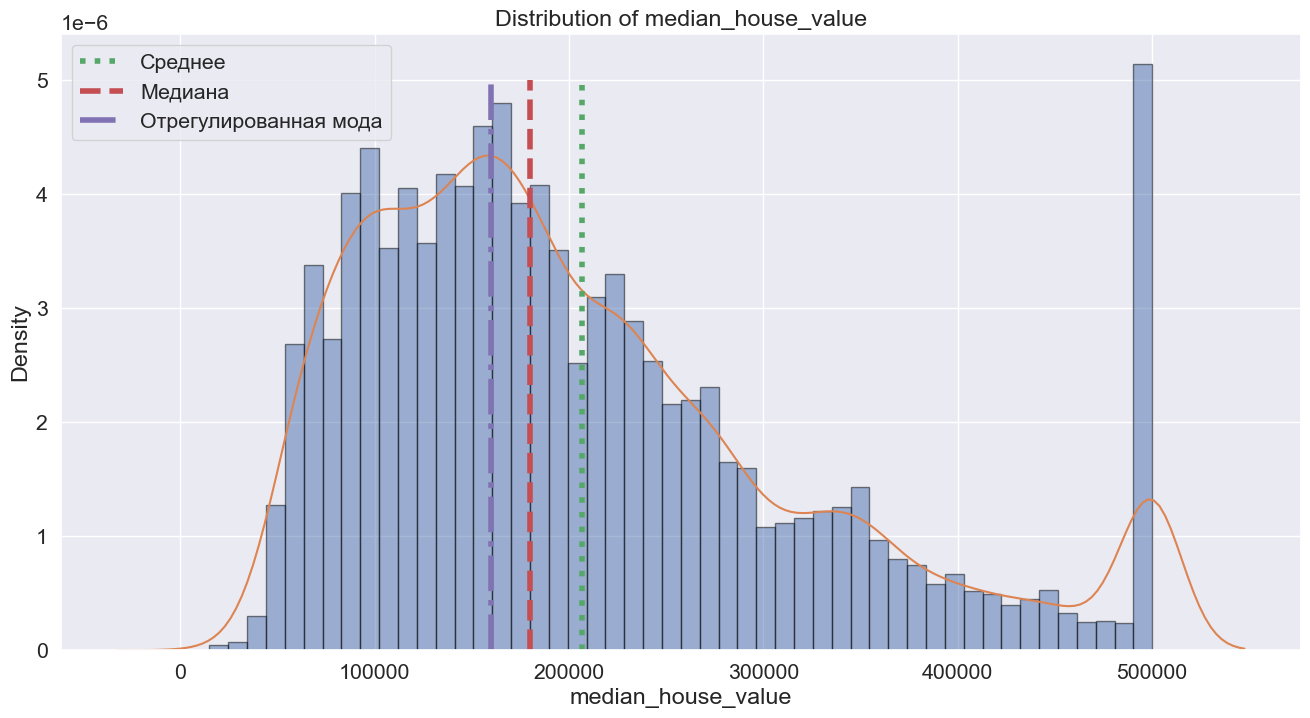

In [107]:
plt.figure(figsize=(16, 8))

plt.hist(df['median_house_value'], bins=50, density=True, alpha=0.5, edgecolor='black')
sns.kdeplot(df['median_house_value'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='Среднее', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='Медиана', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 100, y, label='Отрегулированная мода', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')

plt.legend()
plt.show()

# Анализ признаков

Пока не рассматриваем их влияние на таргет

### Количественные признаки

In [108]:
df_num_features = df.select_dtypes(include=['float64', 'float32'])
df_num_features.drop('median_house_value', axis=1, inplace=True)
df_num_features.drop(df_num_features.columns[10:15], axis=1, inplace=True)
df_num_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_share,population_per_room,median_rooms
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,14.659091,0.365909,2083.0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,15.579659,0.338217,2083.0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,12.951602,0.338105,2083.0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,18.445839,0.437991,2083.0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,17.209589,0.347265,2083.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.089996,39.480000,25.0,1665.0,374.0,845.0,330.0,1.5603,22.462463,0.507508,2130.0
20636,-121.209999,39.490002,18.0,697.0,150.0,356.0,114.0,2.5568,21.520803,0.510760,2130.0
20637,-121.220001,39.430000,17.0,2254.0,485.0,1165.0,433.0,1.7000,21.517303,0.516859,2130.0
20638,-121.320000,39.430000,18.0,1860.0,409.0,741.0,349.0,1.8672,21.989246,0.398387,2130.0


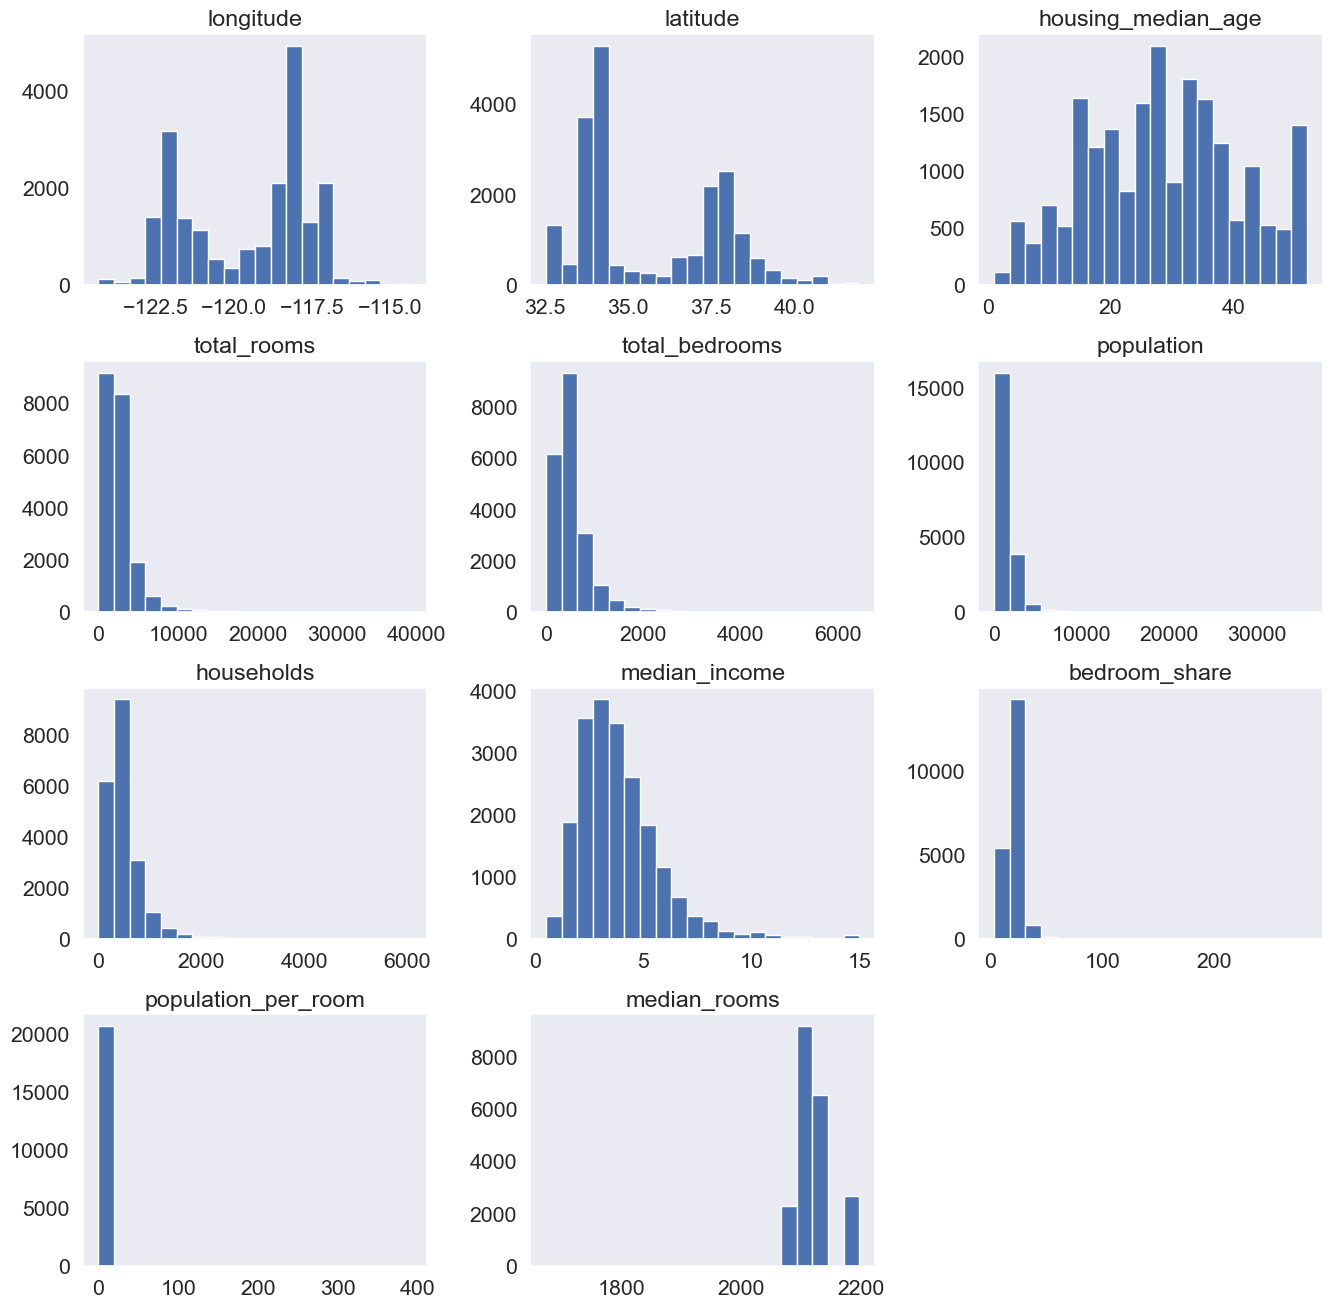

In [109]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False, edgecolor='white')

plt.show()

<Axes: >

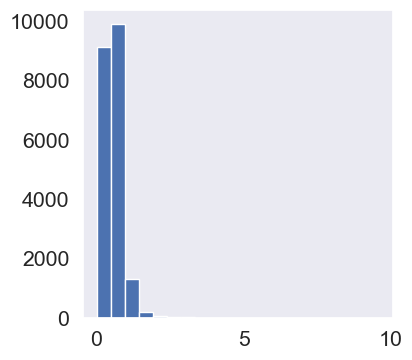

In [110]:
df_num_features.loc[df_num_features['population_per_room'] < 10, 'population_per_room'].hist(figsize=(4,4), bins=20, grid=False, edgecolor='white')

In [111]:
sns.jointplot?


Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

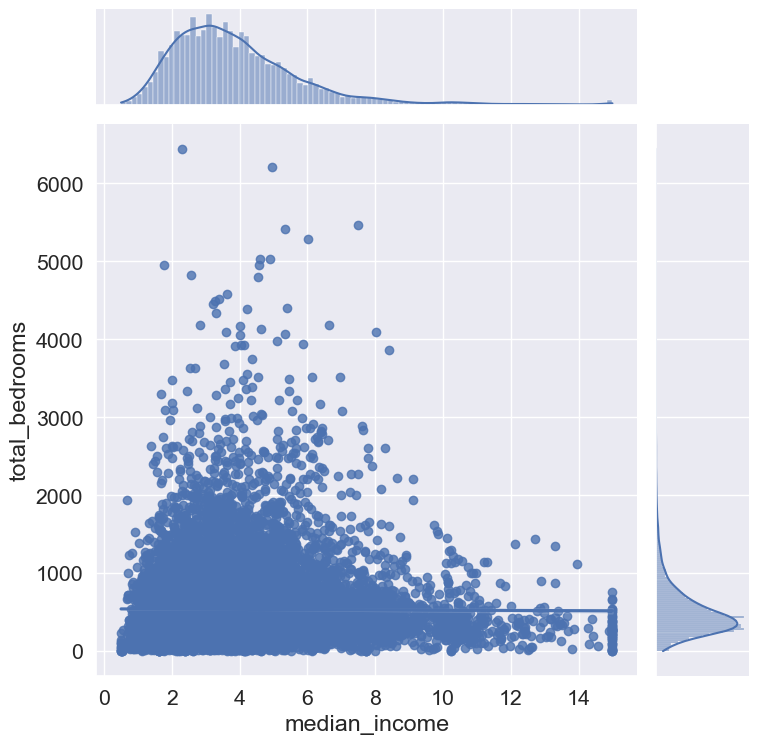

In [112]:
grid = sns.jointplot(x = 'median_income', y = 'total_bedrooms', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

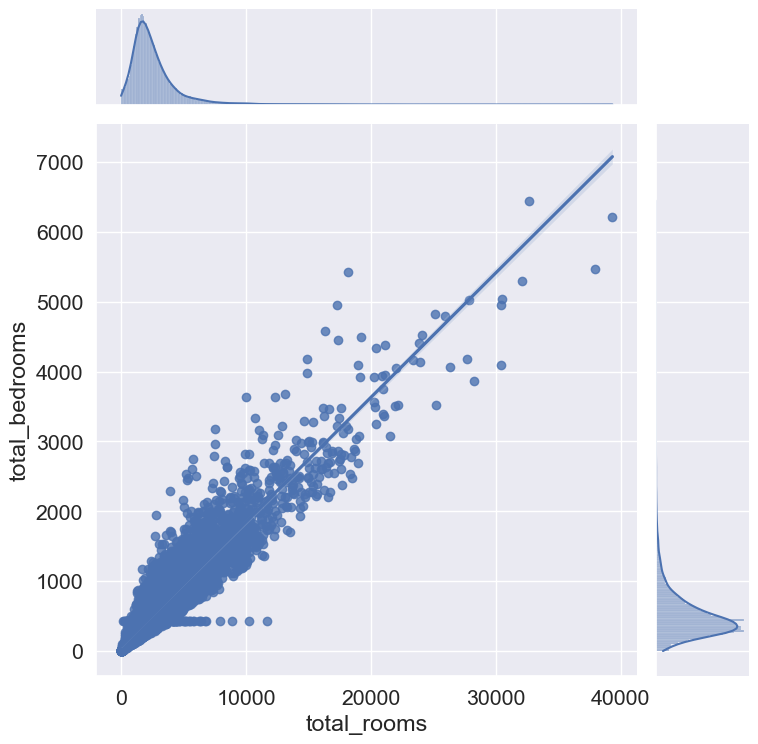

In [113]:
grid = sns.jointplot(x = 'total_rooms', y = 'total_bedrooms', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

In [114]:
df['total_bedrooms'].median()

np.float32(435.0)

In [115]:
df[df['total_bedrooms'] == 435].shape[0] / df.shape[0]

0.011821705426356589

In [116]:
df.shape[0]

20640

In [117]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

244

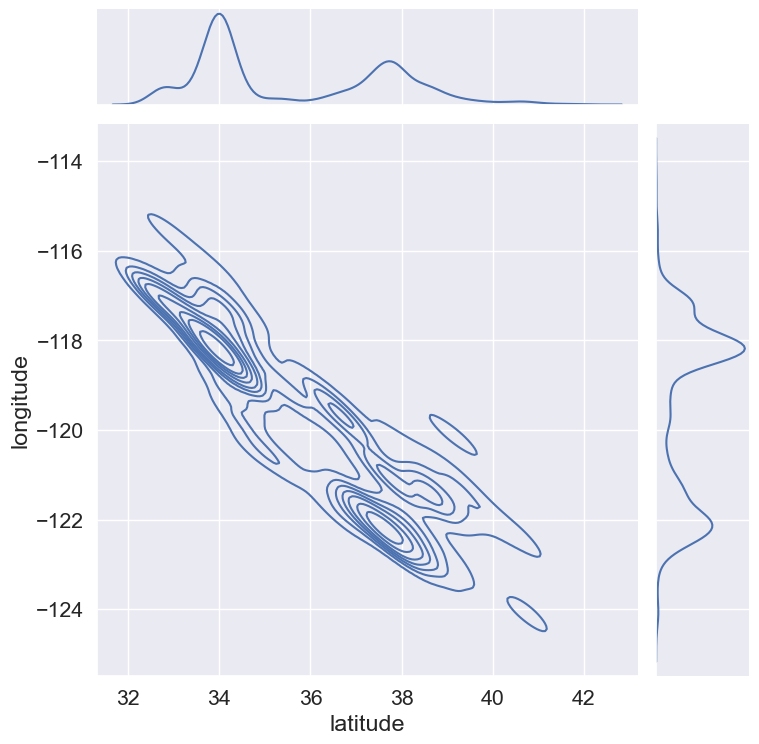

In [118]:
grid = sns.jointplot(x = 'latitude', y = 'longitude', data=df, kind='kde')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

In [119]:
df['city'] = (df['longitude'] > -120) * 1
df['city']

0        0
1        0
2        0
3        0
4        0
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: city, Length: 20640, dtype: int64

In [120]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,city
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0.0,0.0,0.0,1.0,0.0,2083.0,0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0.0,0.0,0.0,1.0,0.0,2083.0,0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0.0,0.0,0.0,1.0,0.0,2083.0,0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445839,0.437991,0.0,0.0,0.0,1.0,0.0,2083.0,0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209589,0.347265,0.0,0.0,0.0,1.0,0.0,2083.0,0


### Категориальные признаки

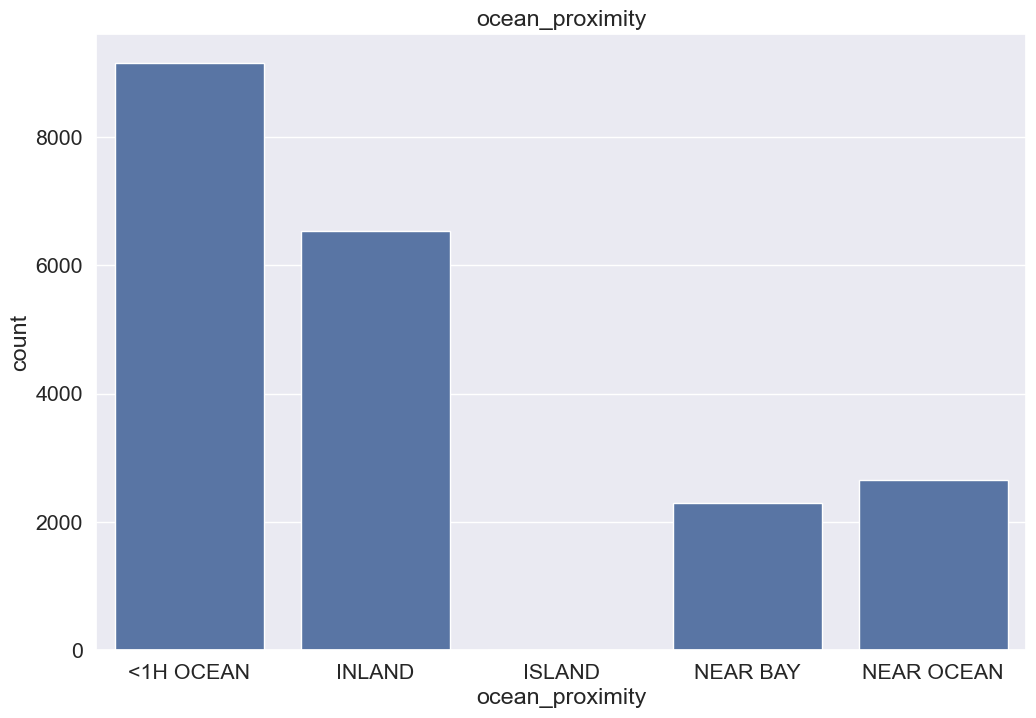

ocean_proximity
<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: count, dtype: int64

In [121]:


counts = df['ocean_proximity'].value_counts()

plt.figure(figsize=(12,8))
plt.title('ocean_proximity')
sns.barplot(counts)

plt.show()
counts

### Бинарные признаки

видим что у нас 5 бинарных признаков: <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20640 non-null  float32 
 1   latitude             20640 non-null  float32 
 2   housing_median_age   20640 non-null  float32 
 3   total_rooms          20640 non-null  float32 
 4   total_bedrooms       20640 non-null  float32 
 5   population           20640 non-null  float32 
 6   households           20640 non-null  float32 
 7   median_income        20640 non-null  float32 
 8   median_house_value   20640 non-null  float32 
 9   ocean_proximity      20640 non-null  category
 10  bedroom_share        20640 non-null  float32 
 11  population_per_room  20640 non-null  float32 
 12  <1H OCEAN            20640 non-null  float32 
 13  INLAND               20640 non-null  float32 
 14  ISLAND               20640 non-null  float32 
 15  NEAR BAY           

In [123]:
df_bin_features = df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]
df_bin_features

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


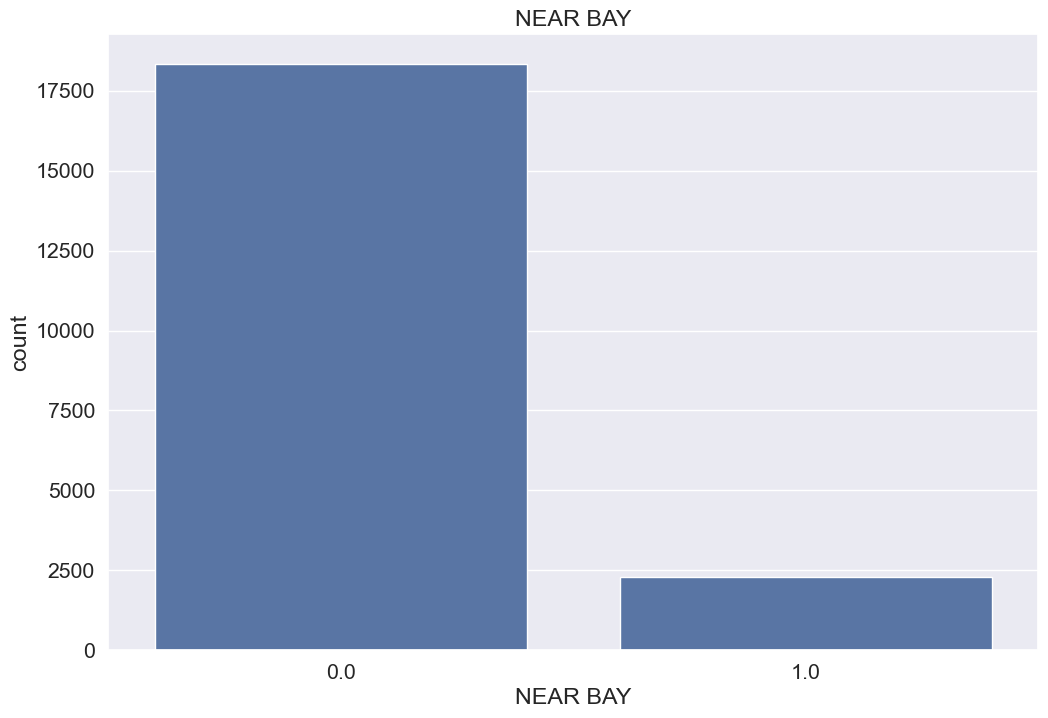

In [124]:
counts = df['NEAR BAY'].value_counts()

plt.figure(figsize=(12, 8))
plt.title('NEAR BAY')
sns.barplot(counts)

plt.show()

### Матрица корреляций

In [125]:
df_not_ocean_proximity = df.drop('ocean_proximity', axis=1)

In [126]:
df_not_ocean_proximity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float32
 1   latitude             20640 non-null  float32
 2   housing_median_age   20640 non-null  float32
 3   total_rooms          20640 non-null  float32
 4   total_bedrooms       20640 non-null  float32
 5   population           20640 non-null  float32
 6   households           20640 non-null  float32
 7   median_income        20640 non-null  float32
 8   median_house_value   20640 non-null  float32
 9   bedroom_share        20640 non-null  float32
 10  population_per_room  20640 non-null  float32
 11  <1H OCEAN            20640 non-null  float32
 12  INLAND               20640 non-null  float32
 13  ISLAND               20640 non-null  float32
 14  NEAR BAY             20640 non-null  float32
 15  NEAR OCEAN           20640 non-null 

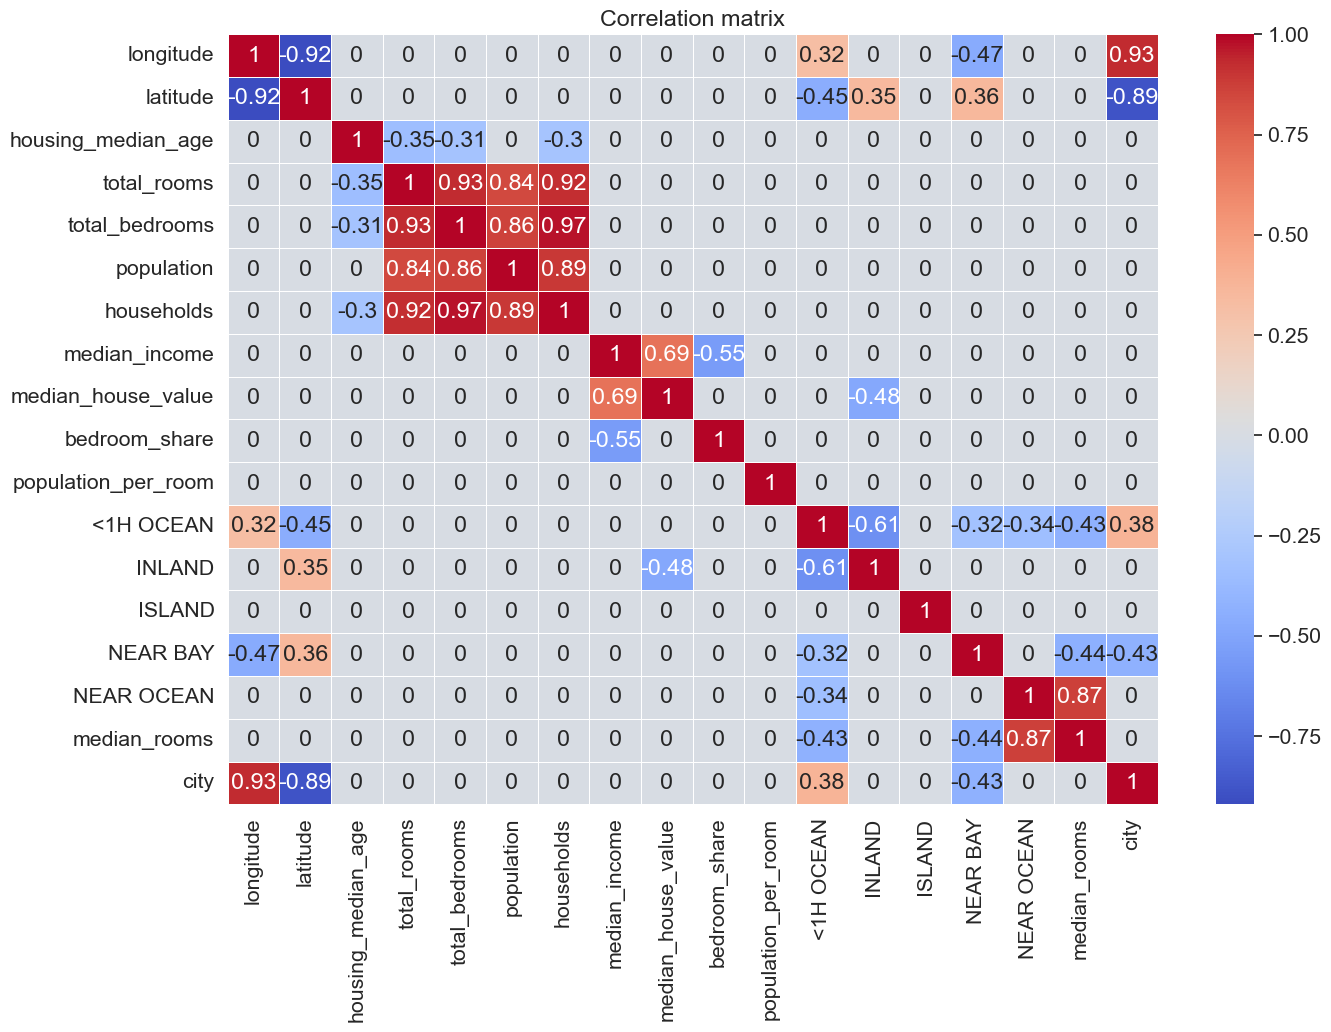

In [127]:
plt.figure(figsize=(15,10))

sns.set_theme(font_scale=1.4)

corr_matrix = df_not_ocean_proximity.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # Проверяем, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show() 

Аккуратно смотрим чтобы у нас все коррелировало правильно и со здравым смыслом

# Анализ зависимости таргета от фичей

### Количественные признаки

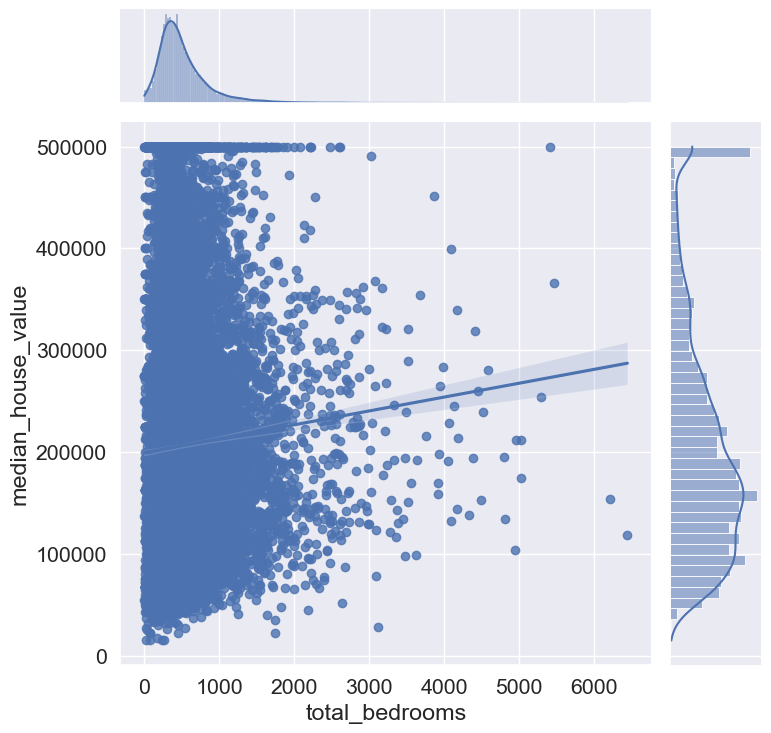

In [128]:
grid = sns.jointplot(x = 'total_bedrooms', y = 'median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

Не очень линейная зависимость

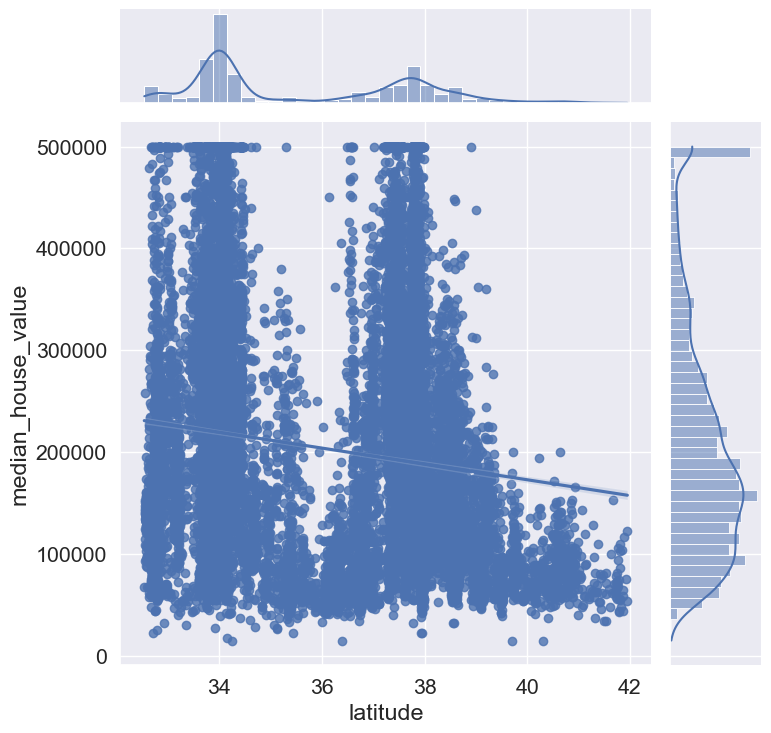

In [129]:
grid = sns.jointplot(x = 'latitude', y = 'median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

Возможно тут два города и можно их разделить

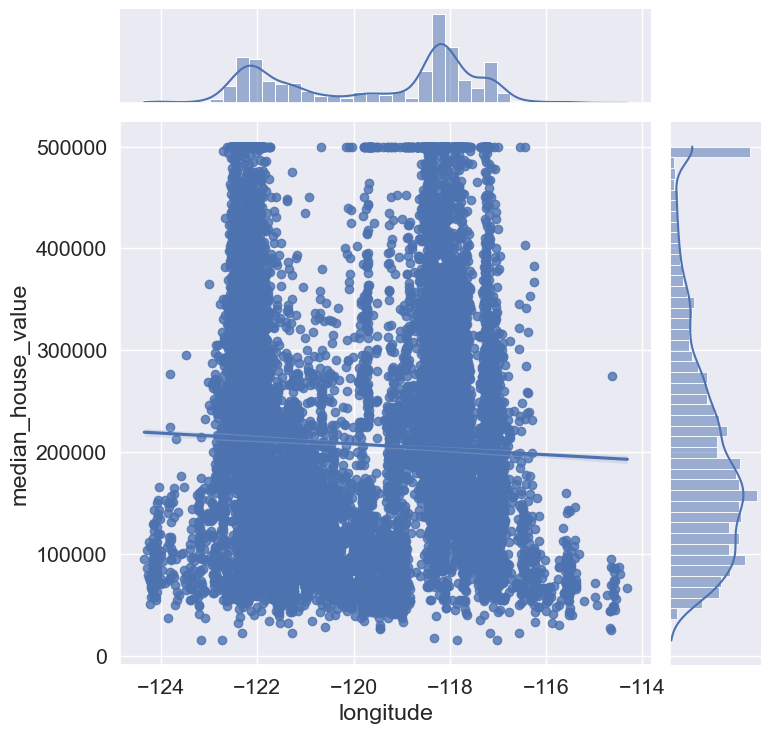

In [130]:
grid = sns.jointplot(x = 'longitude', y = 'median_house_value', data=df, kind='reg')
grid.figure.set_figwidth(8)
grid.figure.set_figheight(8)

plt.show()

Тут такая же история, что и latitude

In [131]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,city,many_bedrooms
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0.0,0.0,0.0,1.0,0.0,2083.0,0,0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0.0,0.0,0.0,1.0,0.0,2083.0,0,0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0.0,0.0,0.0,1.0,0.0,2083.0,0,0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445839,0.437991,0.0,0.0,0.0,1.0,0.0,2083.0,0,0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209589,0.347265,0.0,0.0,0.0,1.0,0.0,2083.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.089996,39.480000,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,22.462463,0.507508,0.0,1.0,0.0,0.0,0.0,2130.0,0,0
20636,-121.209999,39.490002,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,21.520803,0.510760,0.0,1.0,0.0,0.0,0.0,2130.0,0,0
20637,-121.220001,39.430000,17.0,2254.0,485.0,1165.0,433.0,1.7000,92300.0,INLAND,21.517303,0.516859,0.0,1.0,0.0,0.0,0.0,2130.0,0,0
20638,-121.320000,39.430000,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,21.989246,0.398387,0.0,1.0,0.0,0.0,0.0,2130.0,0,0


### Категориальные / бинарные признаки

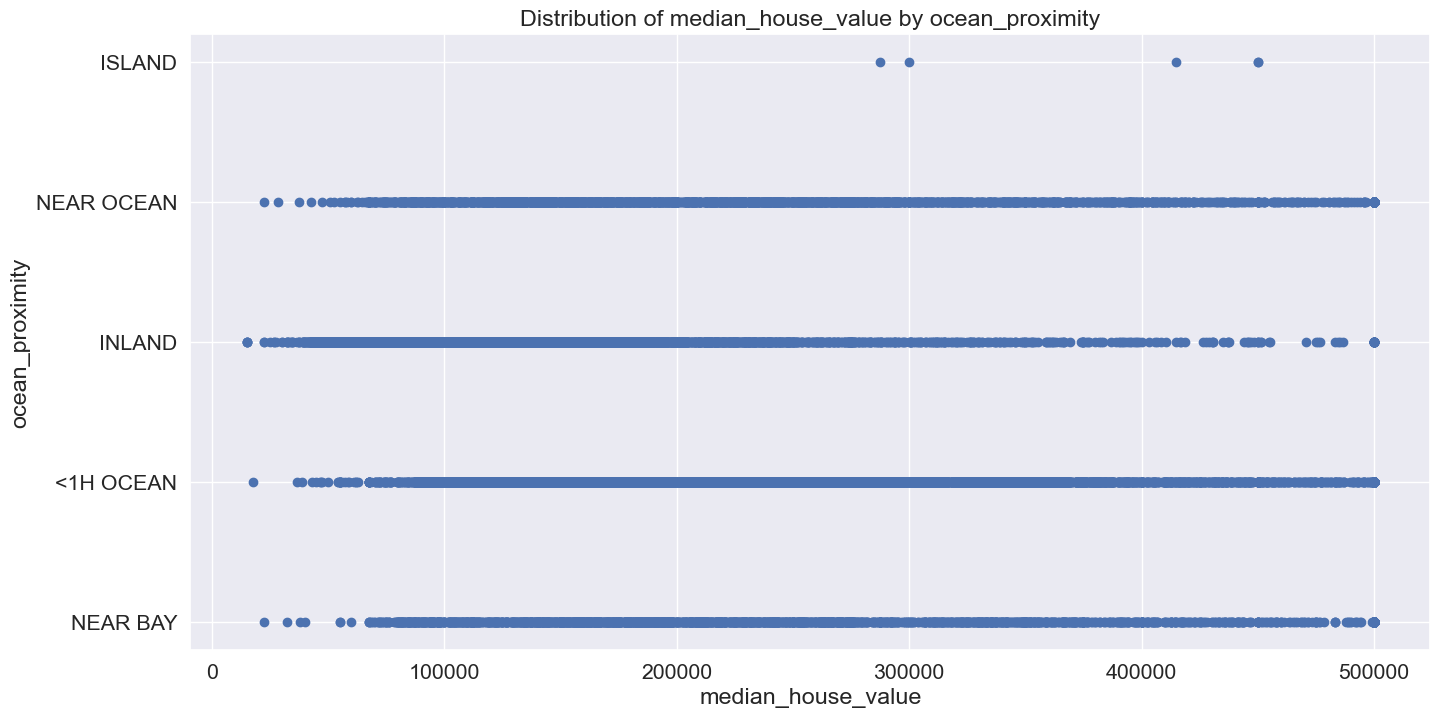

In [134]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')

plt.show()

#### box plot

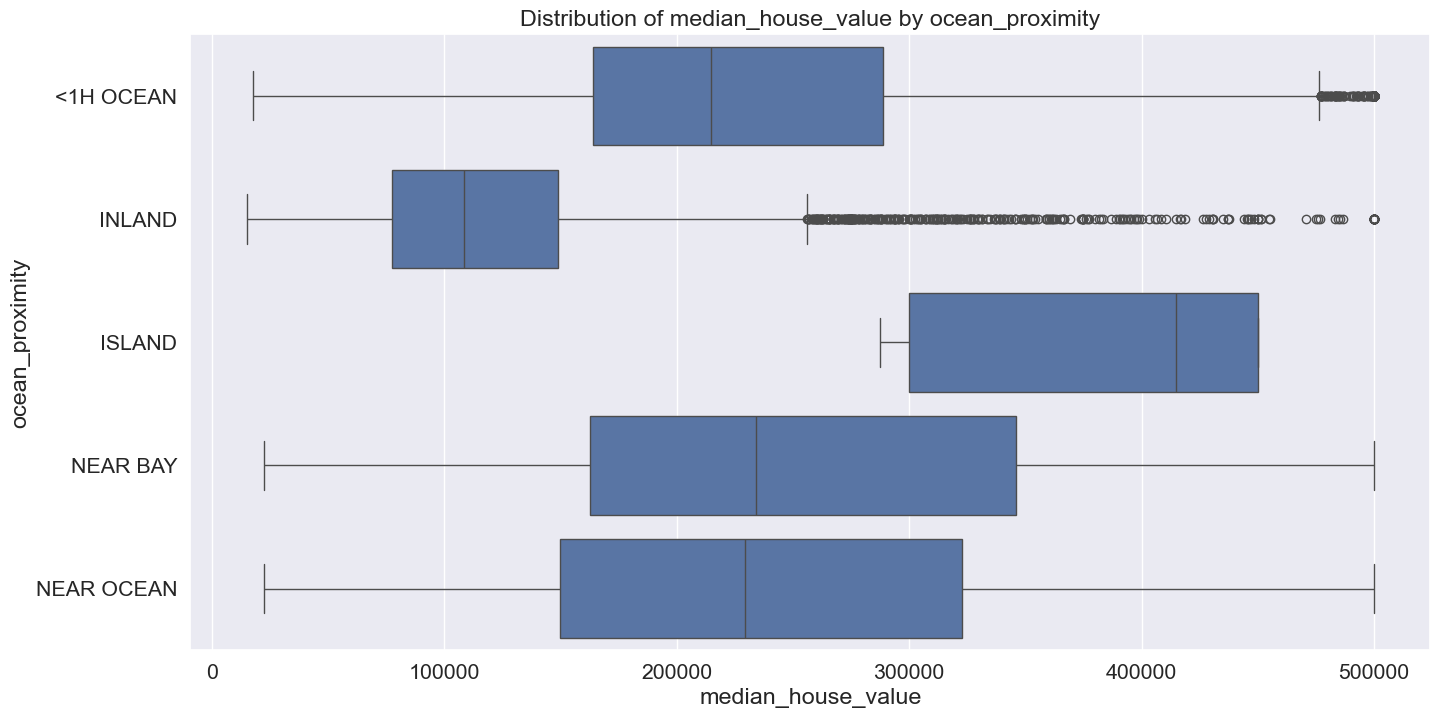

In [136]:
plt.figure(figsize=(16, 8))

sns.boxplot(x = df['median_house_value'], y = df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')

plt.show()

есть выбросы

#### violin plot

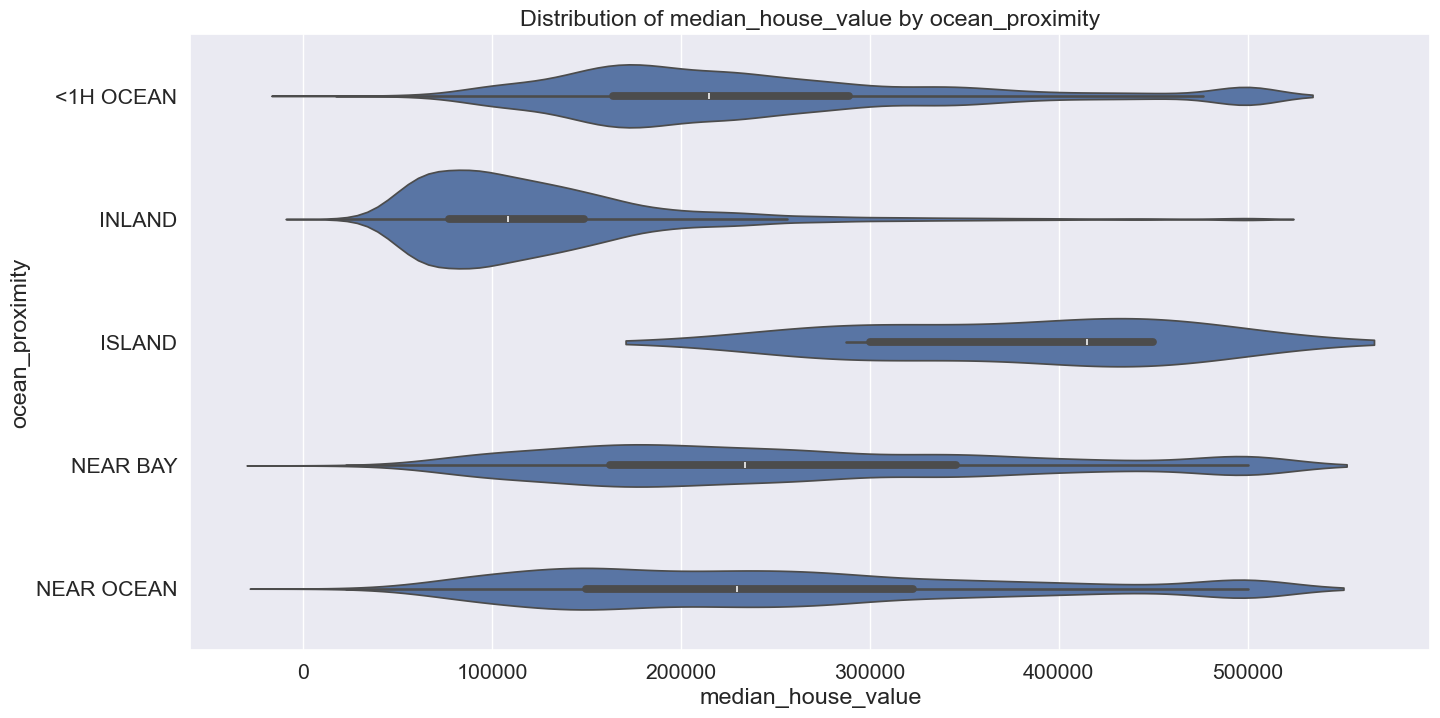

In [137]:
plt.figure(figsize=(16, 8))

sns.violinplot(x = df['median_house_value'], y = df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')

plt.show()

## Гео данные*

Но у нас ведь есть широта и долгота!

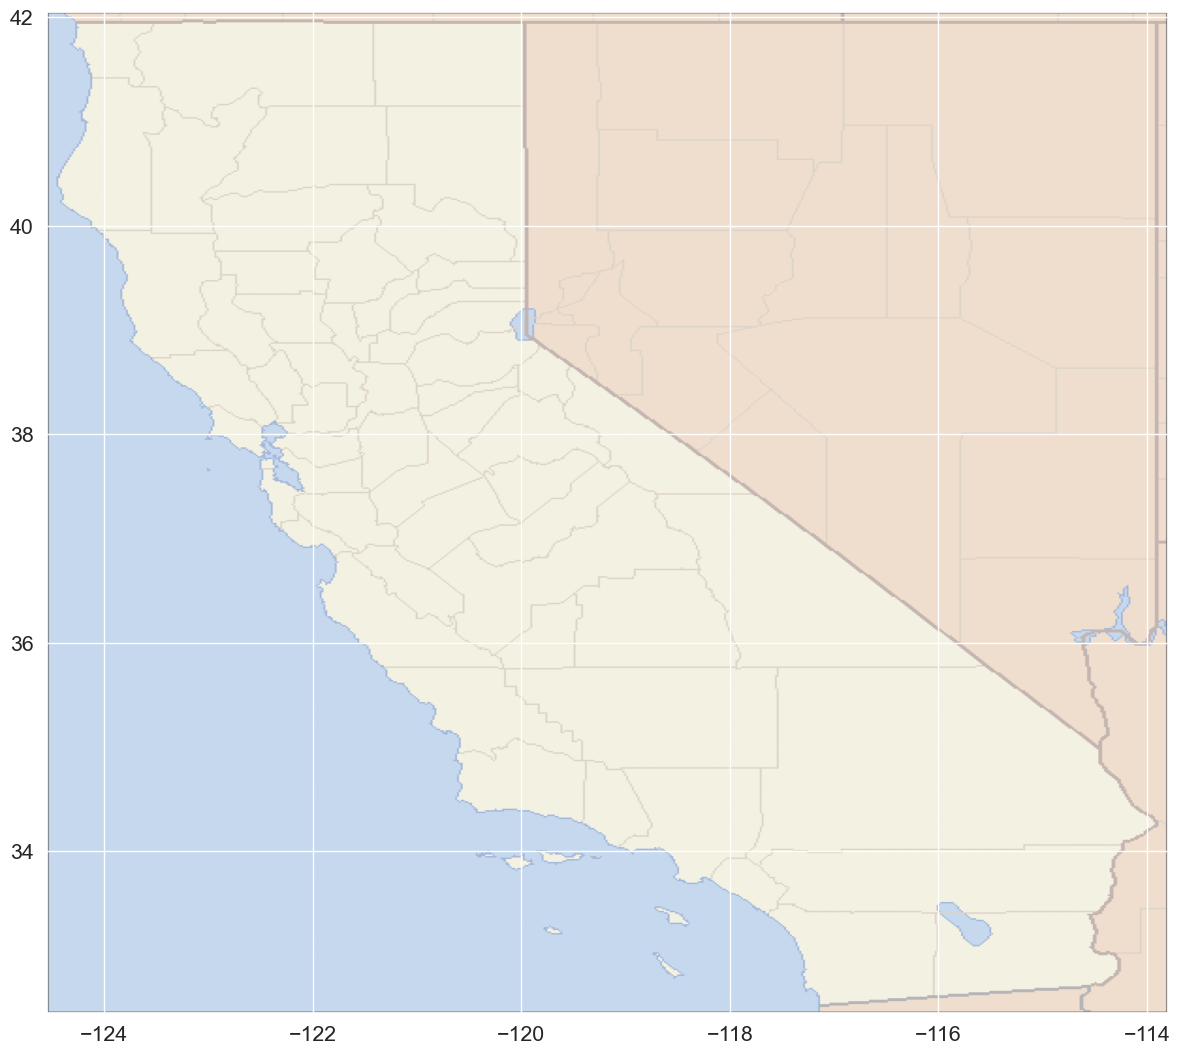

In [141]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20, 13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

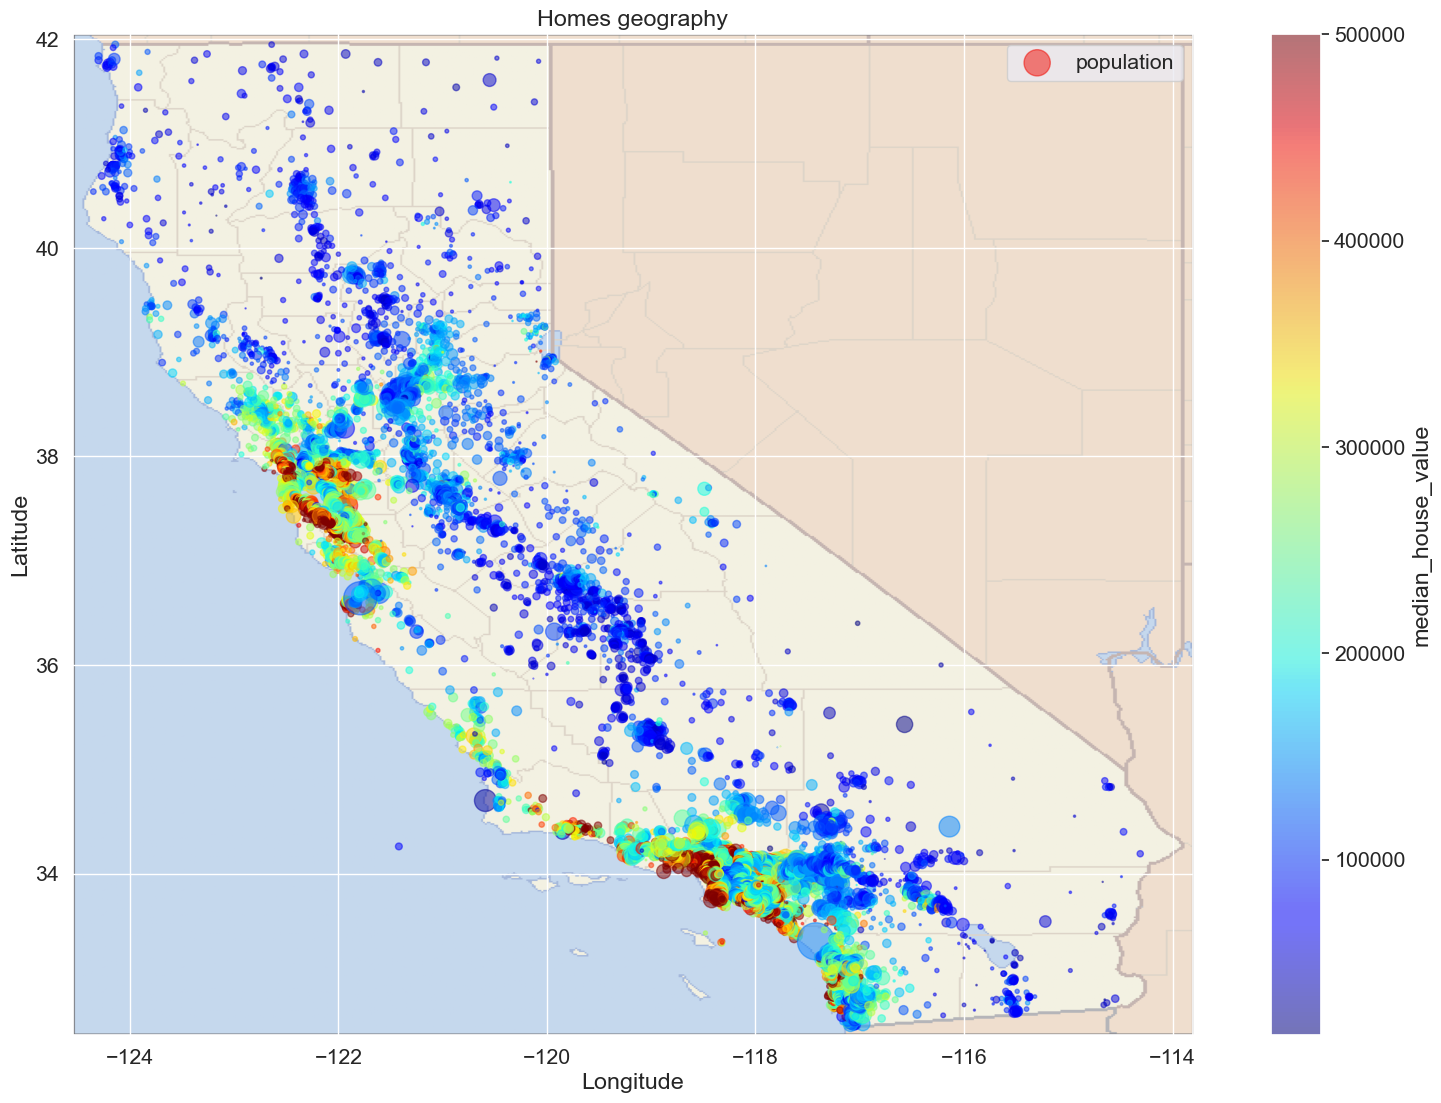

In [157]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, s=df['population'] / 50, label='population', c='median_house_value', cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Homes geography')

plt.legend()
plt.show()

на этом этапе мы можем выделить три группы